In [1]:
shared_variant_count = 0

with open("my_vcf/annovar_res/annotated.hg38_multianno.vcf") as vcf:
    for line in vcf:
        if line.startswith("#"):
            continue

        fields = line.strip().split("\t")
        sample1 = fields[9]
        sample2 = fields[10]

        gt1 = sample1.split(":")[0]
        gt2 = sample2.split(":")[0]

        if gt1 != "./." and gt2 != "./.":
            shared_variant_count += 1

print(f"Number of variants present in both samples: {shared_variant_count}")

Number of variants present in both samples: 392741


In [2]:
import numpy as np
missingness_percent = []
with open("MS_KAZ_WE_125_kaz_samples.MSHC.gold.vcf") as vcf:
    for line in vcf:
        if line.startswith("#"):
            continue

        fields = line.strip().split("\t")
        sample_fields = fields[9:]
        missing_gt = 0

        missing_gt = sum(1 for sample in sample_fields if sample.split(":")[0] == "./.")

        missingness_percent.append(missing_gt/125)

missingness_np = np.array(missingness_percent)*100

In [11]:
print (f"Average missing genotype percentage per variant in gold vcf = {np.mean(missingness_np)}%")
print (f"Maximum missing genotype percentage = {np.max(missingness_np)}%")
print (f"Minimum missing genotype percentage = {np.min(missingness_np)}%")
print (f'Median missing genotype percentage = {np.median(missingness_np)}%')

Average missing genotype percentage per variant in gold vcf = 5.579239611811916%
Maximum missing genotype percentage = 99.2%
Minimum missing genotype percentage = 0.0%
Median missing genotype percentage = 0.8%


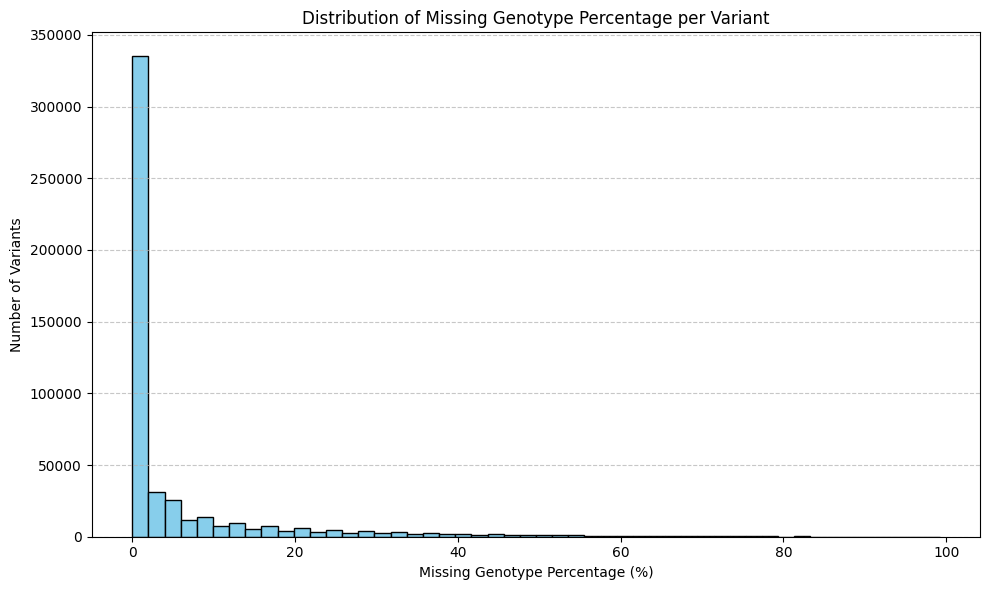

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(missingness_np, bins=50, edgecolor='black')
plt.title('Distribution of Missing Genotype Percentage per Variant')
plt.xlabel('Missing Genotype Percentage (%)')
plt.ylabel('Number of Variants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

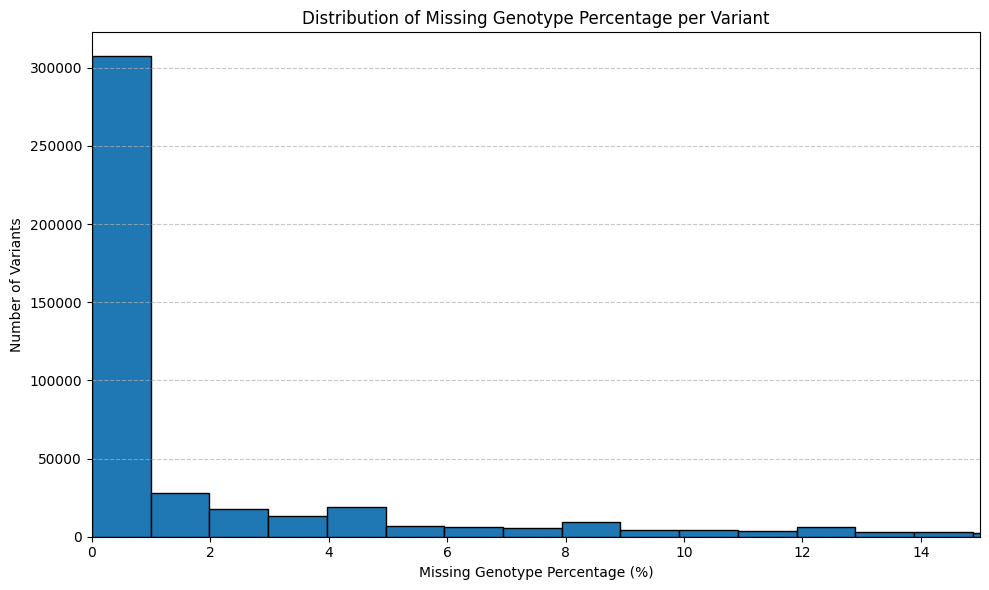

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(missingness_np, bins=100, edgecolor='black')
plt.xlim(0,15)
plt.title('Distribution of Missing Genotype Percentage per Variant, zoomed in')
plt.xlabel('Missing Genotype Percentage (%)')
plt.ylabel('Number of Variants')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()